<div style="color: black; padding: 10px; font-size: 30px">
    <strong>AIN 212 Course Project</strong> 
</div>

<div style="font-size: large; color: black;">
    <ul>
        <li> Yusuf Emir Cömert - 2220765023
        <li> Samet Emin Özen - 2220765018    
    <ul>    
<div>

<div style="color: black; padding: 10px; font-size: 30px">
    <strong>Introduction:</strong> 
</div>

<div style="color: black; padding: 10px; font-size: larger">
    <strong> In this project we made the sentiment analysis from Movie reviews dataset. We chose this dataset because first of all it is textual dataset as it needed to be. Then, when we looked at the data, you can think of a lot of things to predict. We chose to predict that "is review positive,neutral or negative" from the review text. We used nltk library for text processing and sklearn for classification and matplotlib for visualizations.We thought the model types and decided that knn and logistic regression are better. Then analyzed the data , vectorized it and at last balanced it. After predicting the sentiment of the review, we compared the sentiment to the actual ones and saw how it is accurate.</strong> 
</div>

In [169]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import label_binarize
from sklearn.neighbors import KNeighborsClassifier




<div style="color: black; padding: 10px; font-size: larger">
    <strong>### Necessary imports are applied.</strong> 
</div>

In [170]:
#from spacy import load

nltk.download('omw-1.4')
nltk.download('wordnet')
nltk.download('wordnet2022')
nltk.download('stopwords')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\YusufEmirComert\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\YusufEmirComert\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet2022 to
[nltk_data]     C:\Users\YusufEmirComert\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet2022 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\YusufEmirComert\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

<div style="color: black; padding: 10px; font-size: larger">
    <strong>### Some nltk libraries downloaded.</strong> 
</div>

In [171]:
# I think this code will not be needed fot importing library
"""import subprocess
try:
    nltk.data.find('wordnet.zip')
except:
    nltk.download('wordnet', download_dir='/kaggle/working/')
    command = "unzip /kaggle/working/corpora/wordnet.zip -d /kaggle/working/corpora"
    subprocess.run(command.split())
    nltk.data.path.append('/kaggle/working/')
    """
from nltk.corpus import wordnet    

In [172]:
download_link = "https://drive.google.com/uc?export=download&id=1z4VAD93o74nFd90zDe2WYObUJiOr0dR7"


raw_data = pd.read_csv(download_link)
raw_data.head()

,Unnamed: 0,URL,Title,Release Year,Poster,Genre,Director,Cast,Length,IMDB Rating,Metascore,Votes,Gross,Review Title,Review Text,Rating By User,Review Date,Review Author
0,14397,https://www.imdb.com/title/tt0166924/?ref_=ttl...,Mulholland Drive,2001,https://m.media-amazon.com/images/M/MV5BYTRiMz...,"Drama, Mystery, Thriller",David Lynch,"['Naomi Watts', 'Laura Harring', 'Justin Thero...",2h 27m,7.9,86.0,"377,098",$7.22M,"Take a test drive, it can be interesting",This film had such great potential - a fantast...,6,12 April 2002,vikitoria
1,28543,https://www.imdb.com/title/tt0114369/?ref_=ttl...,Se7en,1995,https://m.media-amazon.com/images/M/MV5BOTUwOD...,"Crime, Drama, Mystery",David Fincher,"['Morgan Freeman', 'Brad Pitt', 'Kevin Spacey']",2h 7m,8.6,65.0,"1,757,857",$100.13M,Overatted,I think people just remember this film for its...,6,25 July 2023,lloydchristie
2,959,https://www.imdb.com/title/tt0137523/?ref_=ttl...,Fight Club,1999,https://m.media-amazon.com/images/M/MV5BMmEzNT...,Drama,David Fincher,"['Brad Pitt', 'Edward Norton', 'Meat Loaf']",2h 19m,8.8,67.0,"2,267,031",$37.03M,Good But Not Worthy Of Such a High Ranking in...,Fight Club has all the requirements a cool act...,6,3 June 2000,The Terminator
3,27740,https://www.imdb.com/title/tt0114369/?ref_=ttl...,Se7en,1995,https://m.media-amazon.com/images/M/MV5BOTUwOD...,"Crime, Drama, Mystery",David Fincher,"['Morgan Freeman', 'Brad Pitt', 'Kevin Spacey']",2h 7m,8.6,65.0,"1,757,857",$100.13M,What people find so special about this film?,"It really brings nothing new, it's basically a...",5,19 May 2021,adamkasher
4,42289,https://www.imdb.com/title/tt0887912/?ref_=ttl...,The Hurt Locker,2008,https://m.media-amazon.com/images/M/MV5BYWYxZj...,"Drama, Thriller, War",Kathryn Bigelow,"['Jeremy Renner', 'Anthony Mackie', 'Brian Ger...",2h 11m,7.5,95.0,"468,540",$17.02M,"The lost meaning of Truth, Justice, and Peace",The hurt locker drag you deep in what a soldie...,5,3 February 2011,thethundersd


In [173]:
raw_data.drop(["URL","Poster","Review Date","Review Author"],axis = 1, inplace = True)

<div style="color: black; padding: 10px; font-size: larger">
    <strong>### These columns will not be used so it is deleted.</strong> 
</div>

In [174]:
raw_data.head()

,Unnamed: 0,Title,Release Year,Genre,Director,Cast,Length,IMDB Rating,Metascore,Votes,Gross,Review Title,Review Text,Rating By User
0,14397,Mulholland Drive,2001,"Drama, Mystery, Thriller",David Lynch,"['Naomi Watts', 'Laura Harring', 'Justin Thero...",2h 27m,7.9,86.0,"377,098",$7.22M,"Take a test drive, it can be interesting",This film had such great potential - a fantast...,6
1,28543,Se7en,1995,"Crime, Drama, Mystery",David Fincher,"['Morgan Freeman', 'Brad Pitt', 'Kevin Spacey']",2h 7m,8.6,65.0,"1,757,857",$100.13M,Overatted,I think people just remember this film for its...,6
2,959,Fight Club,1999,Drama,David Fincher,"['Brad Pitt', 'Edward Norton', 'Meat Loaf']",2h 19m,8.8,67.0,"2,267,031",$37.03M,Good But Not Worthy Of Such a High Ranking in...,Fight Club has all the requirements a cool act...,6
3,27740,Se7en,1995,"Crime, Drama, Mystery",David Fincher,"['Morgan Freeman', 'Brad Pitt', 'Kevin Spacey']",2h 7m,8.6,65.0,"1,757,857",$100.13M,What people find so special about this film?,"It really brings nothing new, it's basically a...",5
4,42289,The Hurt Locker,2008,"Drama, Thriller, War",Kathryn Bigelow,"['Jeremy Renner', 'Anthony Mackie', 'Brian Ger...",2h 11m,7.5,95.0,"468,540",$17.02M,"The lost meaning of Truth, Justice, and Peace",The hurt locker drag you deep in what a soldie...,5


In [175]:
# Checking for missing values.
raw_data.isnull().sum()

Unnamed: 0        0
Title             0
Release Year      0
Genre             0
Director          0
Cast              0
Length            0
IMDB Rating       0
Metascore         0
Votes             0
Gross             0
Review Title      0
Review Text       0
Rating By User    0
dtype: int64

In [176]:
# Dropping them.
raw_data = raw_data.dropna()
#raw_data['Rating By User'] = raw_data['Rating By User'].str.extract('(\d+)').astype(int)
# Dont need this code because I handled it while sampling.
raw_data['Rating By User'].dtype

dtype('int64')

In [177]:
row_neut = raw_data[(raw_data["Rating By User"] >= 4) & (raw_data["Rating By User"] <= 6)].sample(2500)
row_pos = raw_data[raw_data["Rating By User"] > 6].sample(2500)
row_neg = raw_data[raw_data["Rating By User"] < 4].sample(2500)

<div style="color: black; padding: 10px; font-size: larger">
    <strong>### Here, the data is arranged according to the part we used.</strong> 
</div>

In [178]:
# Concatenating the data's.
data = pd.concat([row_neut, row_pos, row_neg], axis=0)

In [179]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7500 entries, 1232 to 6124
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      7500 non-null   int64  
 1   Title           7500 non-null   object 
 2   Release Year    7500 non-null   int64  
 3   Genre           7500 non-null   object 
 4   Director        7500 non-null   object 
 5   Cast            7500 non-null   object 
 6   Length          7500 non-null   object 
 7   IMDB Rating     7500 non-null   float64
 8   Metascore       7500 non-null   float64
 9   Votes           7500 non-null   object 
 10  Gross           7500 non-null   object 
 11  Review Title    7500 non-null   object 
 12  Review Text     7500 non-null   object 
 13  Rating By User  7500 non-null   int64  
dtypes: float64(2), int64(3), object(9)
memory usage: 878.9+ KB


In [180]:
sample_text = data.iloc[400]["Review Text"]
print(sample_text)
# Took sample text from data to delete last part (-Was this review helpful? Sign in to vote.-) 

I have never read the book or heard very much about the book to make any comparison. I did just go see the movie. I thought the movie had a great story line and the action was awesome. I have one problem with the film, or maybe more the rating. I am a 25 year old male and by no means a prude, but the R rating this movie received is far to nice. Please be warned that your teenage kids who are into comics will get far more than they bargained for. The R rating states brief nudity and sexual content. My experience with this movie is that the nudity is not brief, and the sexual content was very explicit (far worse than showgirls which received an NC-17 rating). The theater I was in had teenage kids (probably between 13 and 16 years old). The sex scenes in this film reach far above this age limit. I guess my gripe is with the rating company and not the movie. Parents, here is your warning, if you don't want your children to see sexual acts being performed don't take them to this movie.     

In [181]:
print(len("Was this review helpful?  Sign in to vote.                        Permalink"))
# Learned length of it

75


In [182]:
data['Review Text'] = data['Review Text'].apply(lambda x: x[:-173].strip() if x[-75:] == "Was this review helpful?  Sign in to vote.                        Permalink" else x)
# Deleted it using lambda function, now review data is usable.

In [183]:
data.head()

,Unnamed: 0,Title,Release Year,Genre,Director,Cast,Length,IMDB Rating,Metascore,Votes,Gross,Review Title,Review Text,Rating By User
1232,74723,Dunkirk,2017,"Action, Drama, History",Christopher Nolan,"['Fionn Whitehead', 'Barry Keoghan', 'Mark Ryl...",1h 46m,7.8,94.0,"721,115",$188.37M,"Storey less, soul-less spectacle","It's all about good photography, good backgrou...",5
532,48813,Babel,2006,Drama,Alejandro G. Iñárritu,"['Brad Pitt', 'Cate Blanchett', 'Gael García B...",2h 23m,7.5,69.0,"314,314",$34.30M,"""noble"" is the best I can say",A noble attempt. He made his point. But that's...,4
1996,73484,Arrival,2016,"Drama, Mystery, Sci-Fi",Denis Villeneuve,"['Amy Adams', 'Jeremy Renner', 'Forest Whitaker']",1h 56m,7.9,81.0,"747,337",$100.55M,sentimental sap,Most of this film is good. The pacing is stead...,4
1972,26642,Saving Private Ryan,1998,"Drama, War",Steven Spielberg,"['Tom Hanks', 'Matt Damon', 'Tom Sizemore']",2h 49m,8.6,91.0,"1,467,461",$216.54M,Amazing 30 minutes movie,The first 30 minutes (at Omaha beach) is absol...,4
1314,71531,Gattaca,1997,"Drama, Sci-Fi, Thriller",Andrew Niccol,"['Ethan Hawke', 'Uma Thurman', 'Jude Law']",1h 46m,7.7,64.0,"318,452",$12.34M,"It's a bit cool and creepy, but slow and too ...","Gattaca (1997)An interesting concept, with ter...",6


In [184]:
# Random Review Text with 2116'th Row.
sample_sentence = data['Review Text'].iloc[2116]
print(sample_sentence)

Two lazy lowlifes are barely making ends meet. John Cusack and Cameron Diaz literally look dirty and it's kind of hard to watch because of this. They're both in love with Craig's co-worker, the beautiful Catherine Keener. The director tries to make the movie interesting by giving the audience the idea there's going to be a lesbian love scene between Catherine and gross looking Cameron Diaz. Catherine Keener and John Malkovich were the only ones who knew how to act in this movie. Throughout the entire movie Catherine was literally the only one who smiled or even projected a positive vibe. Of course John Malkovich was entertaining in his own way however the movie was sooo lacking in other areas and slow moving despite a couple interesting scenes that they failed to capitalize on. The concept sounds awesome however this movie is a fail. I give it 4 stars because it is a unique concept and kind of interesting however it would have been better as a 30-minute short movie.


In [185]:
tokens = word_tokenize(sample_sentence)
print(tokens)
print("....")
tokens = [word.lower() for word in tokens if word.isalpha()]
print(tokens)
# Transforming sentence to lowerCase

['Two', 'lazy', 'lowlifes', 'are', 'barely', 'making', 'ends', 'meet', '.', 'John', 'Cusack', 'and', 'Cameron', 'Diaz', 'literally', 'look', 'dirty', 'and', 'it', "'s", 'kind', 'of', 'hard', 'to', 'watch', 'because', 'of', 'this', '.', 'They', "'re", 'both', 'in', 'love', 'with', 'Craig', "'s", 'co-worker', ',', 'the', 'beautiful', 'Catherine', 'Keener', '.', 'The', 'director', 'tries', 'to', 'make', 'the', 'movie', 'interesting', 'by', 'giving', 'the', 'audience', 'the', 'idea', 'there', "'s", 'going', 'to', 'be', 'a', 'lesbian', 'love', 'scene', 'between', 'Catherine', 'and', 'gross', 'looking', 'Cameron', 'Diaz', '.', 'Catherine', 'Keener', 'and', 'John', 'Malkovich', 'were', 'the', 'only', 'ones', 'who', 'knew', 'how', 'to', 'act', 'in', 'this', 'movie', '.', 'Throughout', 'the', 'entire', 'movie', 'Catherine', 'was', 'literally', 'the', 'only', 'one', 'who', 'smiled', 'or', 'even', 'projected', 'a', 'positive', 'vibe', '.', 'Of', 'course', 'John', 'Malkovich', 'was', 'entertaining

In [186]:
stop_words = set(stopwords.words('english'))

In [187]:
data = data.dropna()
# Drop the null values.

<div style="color: black; padding: 10px; font-size: larger">
    <strong>### This function process the film length and return as a minute form.</strong> 
</div>

In [188]:
# Converting the hours and minutes of length to minutes and returning it.
def findMinute(x):
    x_splitted = x.split()
    if len(x_splitted) > 1:
        return int(x_splitted[0].replace('h', '')) * 60 + int(x_splitted[1].replace('m', ''))
    else:
        return int(x_splitted[0].replace('h', '')) * 60

data["Length"] = data['Length'].apply(lambda x: findMinute(x))
data['Length'].dtype


dtype('int64')

<div style="color: black; padding: 10px; font-size: larger">
    <strong>### Movie length is at h/m format e.g 2h 18m.</strong> 
</div>

<div style="color: black; padding: 10px; font-size: larger">
    <strong>  Converted to minute format(2*60 + 18)</strong> 
</div>

In [189]:
data['Release Year'] = data['Release Year'].apply(pd.to_numeric)
data['Release Year'].dtype
# Check the column type

dtype('int64')

In [190]:
data['Review Text'] = data['Review Text'].astype(str)
data['Review Text'].dtype
# Check the column type

dtype('O')

In [191]:
data['Director']=data['Director'].replace('sEthan CoenJoel Coen','Coen Brothers').replace('sJoel CoenEthan Coen','Coen Brothers')
data['Director'].dtype
# Check the column type

dtype('O')

In [192]:
data['Votes'] = data['Votes'].replace(',','').apply(pd.to_numeric,errors='coerce')
data['Votes'].dtype
# Check the column type

dtype('float64')

In [193]:
data['IMDB Rating'] = data['IMDB Rating'].apply(pd.to_numeric, errors='coerce')
data['IMDB Rating'].dtype
# Check the column type

dtype('float64')

In [194]:
stop_words = set(stopwords.words('english'))
# Stop words will be removed from texts

In [195]:
# Function to lemmatize words
def lemmatize_words(word):
    lemmatizer = WordNetLemmatizer()
    return lemmatizer.lemmatize(word)

In [196]:
# Function to remove stop words and lemmatize a text
def preprocess_text(text):
    tokens = word_tokenize(text)
    filtered_tokens = [lemmatize_words(word.lower()) for word in tokens if word.isalpha() and word.lower() not in stop_words]
    return ' '.join(filtered_tokens)

In [197]:
data['Review Text'] = data['Review Text'].apply(preprocess_text)
data[['Review Text']]
# Process the data

,Review Text
1232,good photography good background music storey ...
532,noble attempt made point unfortunately best sa...
1996,film good pacing steady thoughtful busy film e...
1972,first minute omaha beach absolutely incredible...
1314,gattaca interesting concept terrific set desig...
...,...
5460,give film simply cant award two half hour tras...
7355,took best part movie strung together second tr...
5685,want minute life back ended fast forwarding ho...
6350,sat hour felt like nothing happened trailer in...


In [198]:
data.head()
# Check the data for looking at changes.

,Unnamed: 0,Title,Release Year,Genre,Director,Cast,Length,IMDB Rating,Metascore,Votes,Gross,Review Title,Review Text,Rating By User
1232,74723,Dunkirk,2017,"Action, Drama, History",Christopher Nolan,"['Fionn Whitehead', 'Barry Keoghan', 'Mark Ryl...",106,7.8,94.0,NaN,$188.37M,"Storey less, soul-less spectacle",good photography good background music storey ...,5
532,48813,Babel,2006,Drama,Alejandro G. Iñárritu,"['Brad Pitt', 'Cate Blanchett', 'Gael García B...",143,7.5,69.0,NaN,$34.30M,"""noble"" is the best I can say",noble attempt made point unfortunately best sa...,4
1996,73484,Arrival,2016,"Drama, Mystery, Sci-Fi",Denis Villeneuve,"['Amy Adams', 'Jeremy Renner', 'Forest Whitaker']",116,7.9,81.0,NaN,$100.55M,sentimental sap,film good pacing steady thoughtful busy film e...,4
1972,26642,Saving Private Ryan,1998,"Drama, War",Steven Spielberg,"['Tom Hanks', 'Matt Damon', 'Tom Sizemore']",169,8.6,91.0,NaN,$216.54M,Amazing 30 minutes movie,first minute omaha beach absolutely incredible...,4
1314,71531,Gattaca,1997,"Drama, Sci-Fi, Thriller",Andrew Niccol,"['Ethan Hawke', 'Uma Thurman', 'Jude Law']",106,7.7,64.0,NaN,$12.34M,"It's a bit cool and creepy, but slow and too ...",gattaca interesting concept terrific set desig...,6


In [199]:
# Turn the numerical data into categorical data
def bin_sentiment(score):
    if score >= 4 and score<= 6:
        return 'neutral'
    elif score <4:
        return 'negative'
    else:
        return 'positive'

<div style="color: black; padding: 10px; font-size: larger">
    <strong>### Looking the sentiment of a movie from user ratings</strong> 
</div>


In [200]:
# Apply the above function to the data
data['Sentiment Category'] = data['Rating By User'].apply(bin_sentiment)
data[['Review Text', 'Rating By User', 'Sentiment Category']]

,Review Text,Rating By User,Sentiment Category
1232,good photography good background music storey ...,5,neutral
532,noble attempt made point unfortunately best sa...,4,neutral
1996,film good pacing steady thoughtful busy film e...,4,neutral
1972,first minute omaha beach absolutely incredible...,4,neutral
1314,gattaca interesting concept terrific set desig...,6,neutral
...,...,...,...
5460,give film simply cant award two half hour tras...,1,negative
7355,took best part movie strung together second tr...,1,negative
5685,want minute life back ended fast forwarding ho...,1,negative
6350,sat hour felt like nothing happened trailer in...,1,negative


In [201]:
data.head()

,Unnamed: 0,Title,Release Year,Genre,Director,Cast,Length,IMDB Rating,Metascore,Votes,Gross,Review Title,Review Text,Rating By User,Sentiment Category
1232,74723,Dunkirk,2017,"Action, Drama, History",Christopher Nolan,"['Fionn Whitehead', 'Barry Keoghan', 'Mark Ryl...",106,7.8,94.0,NaN,$188.37M,"Storey less, soul-less spectacle",good photography good background music storey ...,5,neutral
532,48813,Babel,2006,Drama,Alejandro G. Iñárritu,"['Brad Pitt', 'Cate Blanchett', 'Gael García B...",143,7.5,69.0,NaN,$34.30M,"""noble"" is the best I can say",noble attempt made point unfortunately best sa...,4,neutral
1996,73484,Arrival,2016,"Drama, Mystery, Sci-Fi",Denis Villeneuve,"['Amy Adams', 'Jeremy Renner', 'Forest Whitaker']",116,7.9,81.0,NaN,$100.55M,sentimental sap,film good pacing steady thoughtful busy film e...,4,neutral
1972,26642,Saving Private Ryan,1998,"Drama, War",Steven Spielberg,"['Tom Hanks', 'Matt Damon', 'Tom Sizemore']",169,8.6,91.0,NaN,$216.54M,Amazing 30 minutes movie,first minute omaha beach absolutely incredible...,4,neutral
1314,71531,Gattaca,1997,"Drama, Sci-Fi, Thriller",Andrew Niccol,"['Ethan Hawke', 'Uma Thurman', 'Jude Law']",106,7.7,64.0,NaN,$12.34M,"It's a bit cool and creepy, but slow and too ...",gattaca interesting concept terrific set desig...,6,neutral


In [202]:
#This is how we learned vectorizer.

documents = ["This is the first document.", "This document is the second document.", "And this is the third one."]
vectorizer = TfidfVectorizer()

X = vectorizer.fit_transform(documents)
print(X.toarray())

feature_names = vectorizer.get_feature_names_out()
print("\n",feature_names)

[[0.         0.46941728 0.61722732 0.3645444  0.         0.
  0.3645444  0.         0.3645444 ]
 [0.         0.7284449  0.         0.28285122 0.         0.47890875
  0.28285122 0.         0.28285122]
 [0.49711994 0.         0.         0.29360705 0.49711994 0.
  0.29360705 0.49711994 0.29360705]]

 ['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']


<div style="color: black; padding: 10px; font-size: larger">
    <strong>### This part is not necessary but it shows how vectorizing works.</strong> 
</div>

In [203]:
text_data = data['Review Text']

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
tfidf_matrix = vectorizer.fit_transform(text_data)

In [204]:
# Apply K-Means clustering
k = 3  # You can choose the number of clusters based on your preference
kmeans = KMeans(n_clusters=k)
data['Cluster'] = kmeans.fit_predict(tfidf_matrix)

In [205]:
# Visualize the clusters using PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(tfidf_matrix.toarray())
data['PCA1'] = pca_result[:, 0]
data['PCA2'] = pca_result[:, 1]

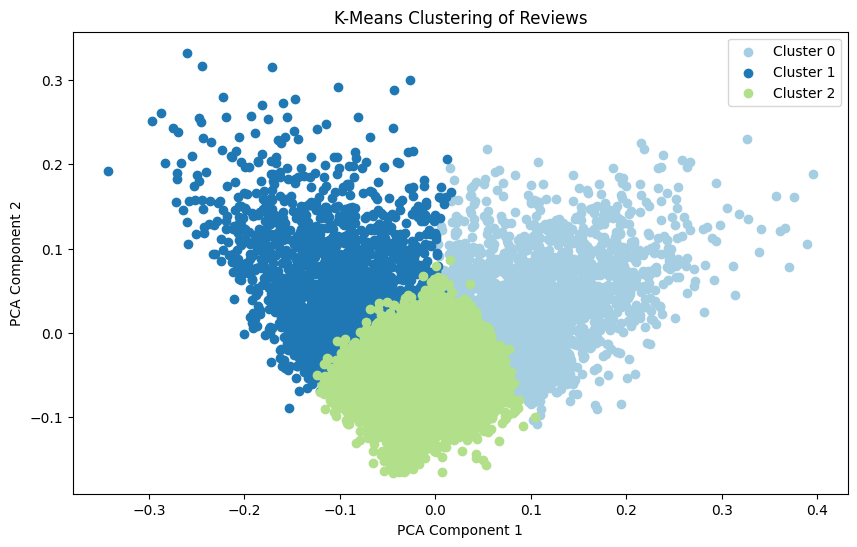

,Unnamed: 0,Title,Release Year,Genre,Director,Cast,Length,IMDB Rating,Metascore,Votes,Gross,Review Title,Review Text,Rating By User,Sentiment Category,Cluster,PCA1,PCA2
1232,74723,Dunkirk,2017,"Action, Drama, History",Christopher Nolan,"['Fionn Whitehead', 'Barry Keoghan', 'Mark Ryl...",106,7.8,94.0,NaN,$188.37M,"Storey less, soul-less spectacle",good photography good background music storey ...,5,neutral,2,-0.015365,-0.051321
532,48813,Babel,2006,Drama,Alejandro G. Iñárritu,"['Brad Pitt', 'Cate Blanchett', 'Gael García B...",143,7.5,69.0,NaN,$34.30M,"""noble"" is the best I can say",noble attempt made point unfortunately best sa...,4,neutral,2,-0.039297,-0.090174
1996,73484,Arrival,2016,"Drama, Mystery, Sci-Fi",Denis Villeneuve,"['Amy Adams', 'Jeremy Renner', 'Forest Whitaker']",116,7.9,81.0,NaN,$100.55M,sentimental sap,film good pacing steady thoughtful busy film e...,4,neutral,1,-0.028126,0.093631
1972,26642,Saving Private Ryan,1998,"Drama, War",Steven Spielberg,"['Tom Hanks', 'Matt Damon', 'Tom Sizemore']",169,8.6,91.0,NaN,$216.54M,Amazing 30 minutes movie,first minute omaha beach absolutely incredible...,4,neutral,2,-0.008238,-0.038573
1314,71531,Gattaca,1997,"Drama, Sci-Fi, Thriller",Andrew Niccol,"['Ethan Hawke', 'Uma Thurman', 'Jude Law']",106,7.7,64.0,NaN,$12.34M,"It's a bit cool and creepy, but slow and too ...",gattaca interesting concept terrific set desig...,6,neutral,2,-0.004917,0.002286


In [206]:
# Plot the clusters
plt.figure(figsize=(10, 6))
colors = plt.cm.Paired(range(k))
for cluster in range(k):
    cluster_data = data[data['Cluster'] == cluster]
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], color=colors[cluster], label=f'Cluster {cluster}')

plt.title('K-Means Clustering of Reviews')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

data.head()

<div style="color: black; padding: 10px; font-size: larger">
    <strong>### We used PCA to reduce dimensions in our vectorized text array. Then we took the first two element of array and set them pca component 1 and component 2. In the other step we create two columns in the data "PCA1" and "PCA2". Using these columns we visualize the clustering in three cluster.</strong> 
</div>

<div style="color: black; padding: 10px; font-size: 30px">
    <strong>Logistic Regression Model</strong> 
</div>

In [207]:
X = data['Review Text']
y = data['Sentiment Category']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [208]:
# Logistic Regression Model
logreg = LogisticRegression()
logreg.fit(X_train_tfidf, y_train)

# Predictions
y_pred = logreg.predict(X_test_tfidf)

In [209]:
# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nClassifier: Logistic Regression")
print(f"Accuracy: {accuracy:.2f}")


Classifier: Logistic Regression
Accuracy: 0.67


In [210]:
# Print classification report and confusion matrix
classification_report_str = classification_report(y_test, y_pred, zero_division=1)
print("Classification Report:\n", classification_report_str)

Classification Report:
               precision    recall  f1-score   support

    negative       0.74      0.69      0.71       505
     neutral       0.56      0.54      0.55       496
    positive       0.72      0.79      0.75       499

    accuracy                           0.67      1500
   macro avg       0.67      0.67      0.67      1500
weighted avg       0.67      0.67      0.67      1500



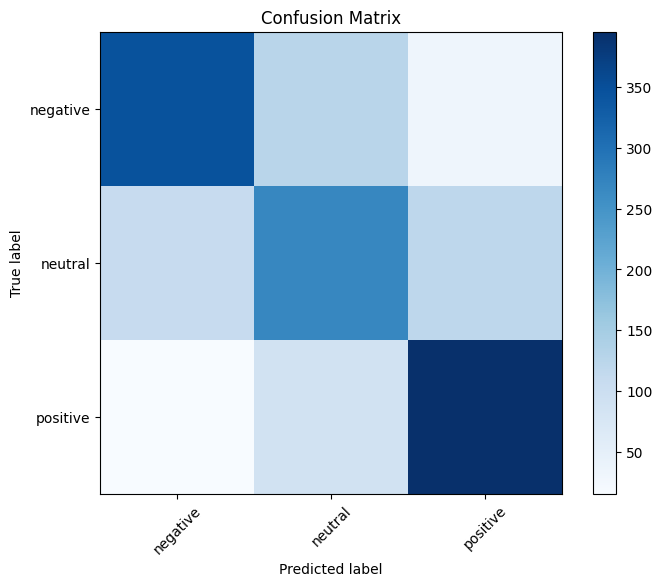

In [211]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

classes = np.unique(y)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


<div style="color: black; padding: 10px; font-size: larger">
    <strong>At first we vectorized the data as always and then define logistic regression model for train and test data. After doing these things we trained the model then get the results but there was a problem. Recall of neutral class is so low nearly zero and precision of the positive class so high then we discussed about that. Then decided that problem was our data is not balanced. We balance classes choosing same number of sample for evey class. We get the result and realized recall problem is fixed and for every class parameters are close each others.</strong> 
</div>

<div style="color: black; padding: 10px; font-size: larger">
    <strong>As we can see in the confusion matrix neutral class is still lower than the others but we couldn't fix it.</strong> 
</div>

<div style="color: black; padding: 10px; font-size: 30px">
    <strong>KNN Classification Model</strong> 
</div>

In [212]:
X = data['Review Text']
y = data['Sentiment Category']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

Best k value: 17


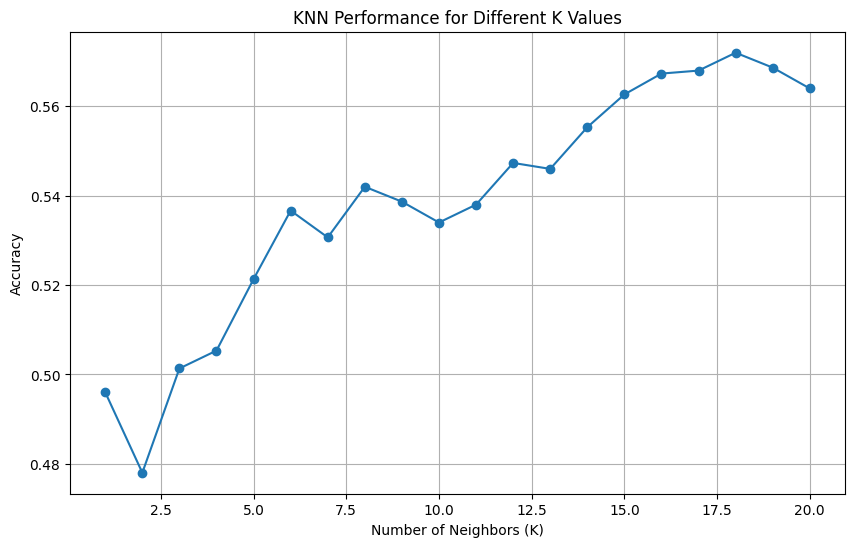

In [213]:
# Iterate over different k values
k_values = np.arange(1, 21)
accuracy_scores = []

for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train_tfidf, y_train)
    y_pred = knn_classifier.predict(X_test_tfidf)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Find the best k value
#best_k = k_values[np.argmax(accuracy_scores)]
best_k = 17
print(f"Best k value: {best_k}")

# Plot accuracy for different k values
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='-')
plt.title('KNN Performance for Different K Values')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

In [214]:
# Train the model with the best k value
best_knn_classifier = KNeighborsClassifier(n_neighbors=best_k)
best_knn_classifier.fit(X_train_tfidf, y_train)

KNeighborsClassifier(n_neighbors=17)

In [215]:
# Make predictions and evaluate
y_pred_best = best_knn_classifier.predict(X_test_tfidf)
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"\nClassifier: K-Nearest Neighbors (Best K)")
print(f"Accuracy: {accuracy_best:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred_best))


Classifier: K-Nearest Neighbors (Best K)
Accuracy: 0.57
Classification Report:
               precision    recall  f1-score   support

    negative       0.61      0.62      0.62       500
     neutral       0.43      0.34      0.38       465
    positive       0.61      0.72      0.66       535

    accuracy                           0.57      1500
   macro avg       0.55      0.56      0.55      1500
weighted avg       0.56      0.57      0.56      1500



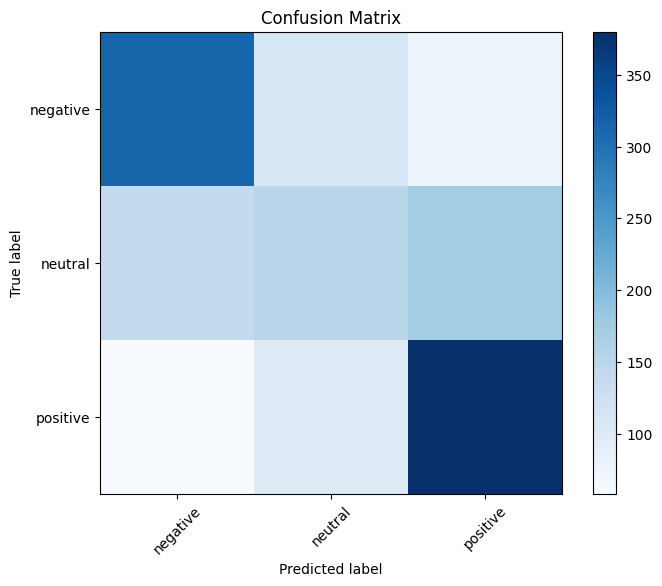

In [216]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

classes = np.unique(y)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


<div style="color: black; padding: 10px; font-size: larger">
    <strong>In the KNN Classification we try to find best k value between these values 1-21 for our model. Then according accuracy for each of them we get the best result at k= 17. We get the accuracy for knn nearly 57%. Actually we were getting better results at before we changed data balanced but these results might be tricky so that decided to put this result. We try to change rating range for neutral class but we get worse results because when we decrease the range of it model predict negative or positive rather than neutral.</strong> 
</div>

<div style="color: black; padding: 10px; font-size: 30px">
    <strong> Conclusion: </strong> 
</div>

<div style="color: black; padding: 10px; font-size: larger">
    <strong>Finally, our models made not perfect but good predictions. If we tried to predict the review texts positive or negative(not neutral), we could've predict a lot more accurate results but we wanted to do a litle bit complicated and different than the other students.  </strong> 
</div>